# Task 3

## For this task,  I have considered to analyze and predict the risk of occurance of heart stroke in a person, given various medical conditions and demographics of the population.

In [1]:
import warnings
warnings.filterwarnings("ignore")

## Importing Required Modules

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

## Importing Dataset

In [3]:
df=pd.read_csv("healthcare-dataset-stroke-data.csv")

In [4]:
df

id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0           Private          Urban             228.69  36.6  formerly smoked   
1     Self-employed          Rural             202.21   NaN     never smoked   
2           Private          Rural             105.92  32.5     never smoked   
3           Private          Urban             171.23  34.4           smokes   
4     Self-employed          Rural             174.12  24.0     never smoked   
...             ...            ...                ...   ...              ...   
5105        Private          Urban              83.75   NaN     never smoked   
5106  Self-employed          Urban             125.20  40.0     never smoked   
5107  Self-employed          Rural              82.99  30.6     never smoked   
5108        Private          Rural             166.29  25.6  formerly smoked   
5109       Govt_job          Urban              85.28  26.2          Unknown   

      stroke  
0          1  
1          1  
2          1  
3          1  
4          1  
...      ...  
5105       0  
5106       0  
5107       0  
5108       0  
5109       0  

[5110 rows x 12 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


## Dividing the features into discrete and continous variables

In [6]:
object_columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
numeric_columns = ['age', 'avg_glucose_level', 'bmi']

## Visaulizing Continous Features

### 1. Histogram Distribution

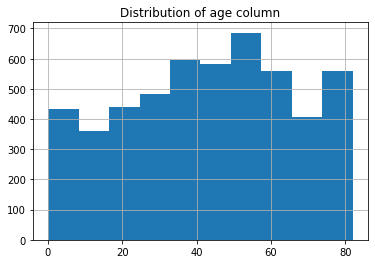

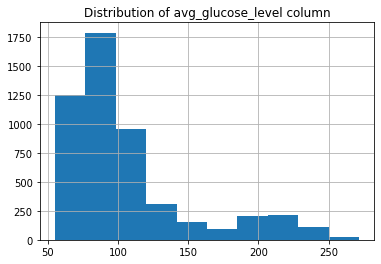

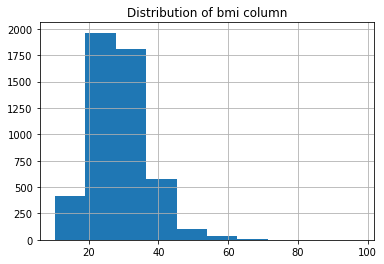

In [7]:
for i in numeric_columns:
    df[i].hist()
    plt.title("Distribution of {} column".format(i))
    plt.show()

### 2. Box Plot Distribution

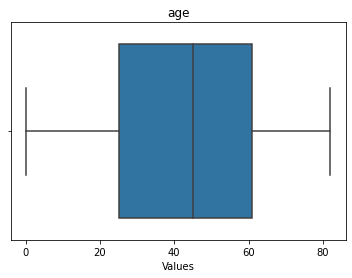

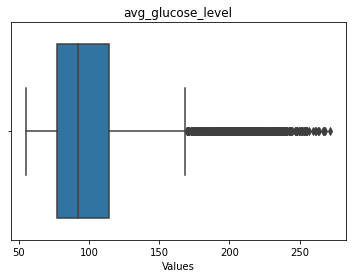

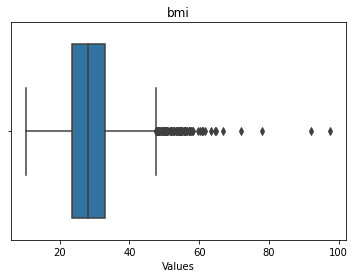

In [8]:
import matplotlib.pyplot as plt
for column in numeric_columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(df[column].dropna())
    plt.title(column)
    plt.xlabel('Values')
    plt.show()

### 3. Violin Plot Distribution for both Stroke and Non-Stroke patients

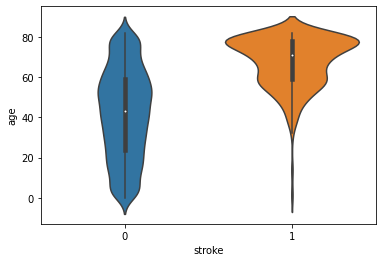

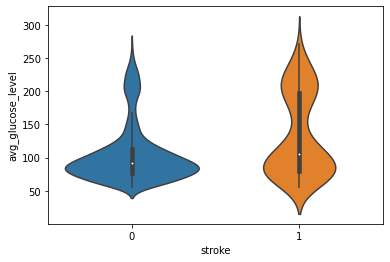

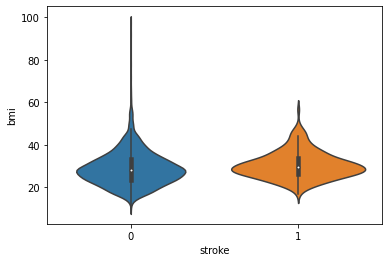

In [9]:
for i in numeric_columns:
    sns.violinplot(df['stroke'],df[i])
    plt.show()

# Insights from above visualizations:

1. Considering age as the factor for analysis, it is clear that people above the age of 60 have a higher risk of getting a stroke, and the age group 75-80 becoming more riskier

2. People not having stroke have well balanced glucose levels way below 100 but those people having variable levels at around 100 and greater than 200 have been affected with heart stroke.

3. BMI doesn't clearly distinguish between non-stroke and stroke patients as in both those cases the distribution has remained similar.

## Converting Categorical data into numeric through Label Encoding and visualizing their patterns

In [10]:
from sklearn.preprocessing import LabelEncoder
df_new=df.copy(deep=True)
label_encoder = LabelEncoder()
dic={}
for column in object_columns:
    df_new[column] = label_encoder.fit_transform(df_new[column])
    dic[column]=dict(zip(range(len(label_encoder.classes_)), label_encoder.classes_))
df_new

id  gender   age  hypertension  heart_disease  ever_married  \
0      9046       1  67.0             0              1             1   
1     51676       0  61.0             0              0             1   
2     31112       1  80.0             0              1             1   
3     60182       0  49.0             0              0             1   
4      1665       0  79.0             1              0             1   
...     ...     ...   ...           ...            ...           ...   
5105  18234       0  80.0             1              0             1   
5106  44873       0  81.0             0              0             1   
5107  19723       0  35.0             0              0             1   
5108  37544       1  51.0             0              0             1   
5109  44679       0  44.0             0              0             1   

      work_type  Residence_type  avg_glucose_level   bmi  smoking_status  \
0             2               1             228.69  36.6               1   
1             3               0             202.21   NaN               2   
2             2               0             105.92  32.5               2   
3             2               1             171.23  34.4               3   
4             3               0             174.12  24.0               2   
...         ...             ...                ...   ...             ...   
5105          2               1              83.75   NaN               2   
5106          3               1             125.20  40.0               2   
5107          3               0              82.99  30.6               2   
5108          2               0             166.29  25.6               1   
5109          0               1              85.28  26.2               0   

      stroke  
0          1  
1          1  
2          1  
3          1  
4          1  
...      ...  
5105       0  
5106       0  
5107       0  
5108       0  
5109       0  

[5110 rows x 12 columns]

### Distribution of Categorical Features on Patients who were prone to stroke

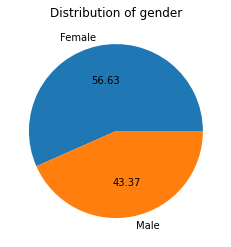

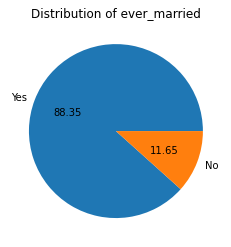

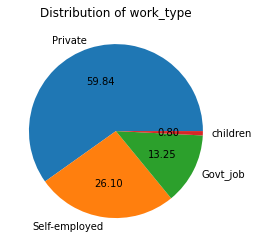

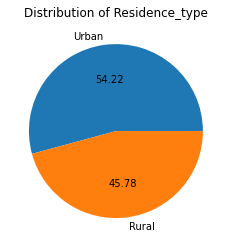

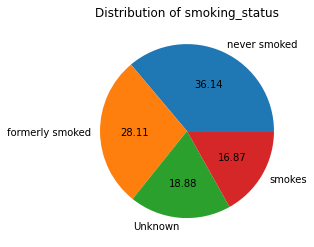

In [12]:
for i in object_columns:
        plt.title("Distribution of {}".format(i))
        plt.pie(df_new[df_new['stroke']==1][i].value_counts(),labels=[dic[i][x] for x in df_new[df_new['stroke']==1][i].value_counts().index],autopct='%.2f')
        plt.show()

# Insights from the above visualizations

1. Compared to Male population, Female Population is at a Higher risk of getting a Heart Stroke

2. Nearly 90% of the population who got stroke were married

3. People working in the private sector have a higher risk of getting a stroke than that of self-employed, government job and chidlren combined

4. Compared to population in rural regions, population living in metro cities and urban areas is at a Higher risk of getting a Heart Stroke 

5. Though people who do not smoke have a higher risk of getting a stroke, currently smoking and having an history of smoking puts one at a higher risk of getting a stroke

## Identifying the correlation between all the numeric features

<AxesSubplot:>

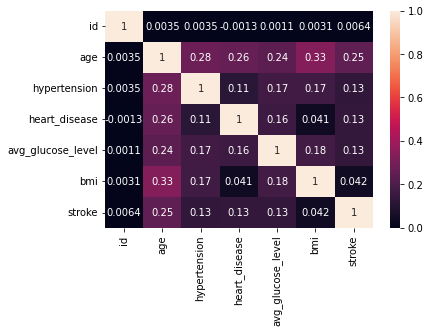

In [13]:
sns.heatmap(df.corr(),annot=True)

### There is no significant mathematical correlation between any of the given numeric features

## Identifying the Number of Null values

In [14]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

## Imputing the BMI features with mean

In [15]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
df_new['bmi'] = imputer.fit_transform(np.array(df_new['bmi']).reshape(-1, 1))

## Using PCA to reduce dimensionality

In [16]:
import numpy as np

#### Retaining 95% of variance and reducing dimensionality

In [17]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
s=StandardScaler()
df_scaled=s.fit_transform(df_new.iloc[:,:-1])
principal=PCA(0.95)
principal.fit(df_scaled)
X=principal.transform(df_scaled)
y=df_new.iloc[:,-1]
principal.explained_variance_ratio_

array([0.23793633, 0.11435957, 0.09117559, 0.09085165, 0.08620564,
       0.08223434, 0.07571715, 0.07353215, 0.0641442 , 0.05728533])

## The Dataset is highly imbalanced to Non-Stroke patients. Hence, using synthetic sampling techniques to bring balance for both the classes

In [18]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X, y = smote.fit_resample(X, y)
print(y.value_counts())

0    4861
1    4861
Name: stroke, dtype: int64


# Machine Learning

## Logistic Regression 

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)

score = logistic_regression.score(X_test, y_test)
predictions = logistic_regression.predict(X_test)
print("Model Score:", score)
predictions = logistic_regression.predict(X_test)
classification_rep = classification_report(y_test, predictions)
print("Classification Report:")
print(classification_rep)

Model Score: 0.7696658097686375
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.71      0.75       975
           1       0.74      0.83      0.78       970

    accuracy                           0.77      1945
   macro avg       0.77      0.77      0.77      1945
weighted avg       0.77      0.77      0.77      1945



## Decision Tree

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
predictions = decision_tree.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy Score:", accuracy)


Accuracy Score: 0.8951156812339331


In [21]:

predictions = decision_tree.predict(X_test)
classification_rep = classification_report(y_test, predictions)
print("Classification Report:")
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.87      0.89       975
           1       0.88      0.92      0.90       970

    accuracy                           0.90      1945
   macro avg       0.90      0.90      0.90      1945
weighted avg       0.90      0.90      0.90      1945



## Random Forest Classifier

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
predictions = rf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy Score:", accuracy)


Accuracy Score: 0.9444730077120823


In [23]:
predictions = rf.predict(X_test)
classification_rep = classification_report(y_test, predictions)
print("Classification Report:")
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.91      0.94       975
           1       0.92      0.98      0.95       970

    accuracy                           0.94      1945
   macro avg       0.95      0.94      0.94      1945
weighted avg       0.95      0.94      0.94      1945



## Random Forest is the best performing model that perfectly fits the variation in the data and predicts with an accuracy of 94%